In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Generic Packages
import numpy as np
import os
import pandas as pd

#Machine Learning Library
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt

#openCV
import cv2

#Tensor Flow
import tensorflow as tf

#Display Progress
from tqdm import tqdm

from skimage.transform import resize
from skimage.io import imread

In [4]:
categories = ['rose flower','sunflower flower','marigold flower','daisy flower']
categories_label = {category:i for i, category in enumerate(categories)}

nb_categories = len(categories)

In [5]:
def load_data():

  rootdir = '/content/drive/MyDrive/project3/data/practice_image/flower_images'
  images = []
  labels = []
# Iterate through each folder corresponding to a category
  for category in categories:
    path = os.path.join(rootdir,category)
    label = categories_label[category]

# Iterate through each image in our folder
    for img in tqdm(os.listdir(path)):
      try:
        # Get the path name of the image
        img_path = os.path.join(path, img)

        # Open and resize the img
        image = cv2.imread(img_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(150, 150))

        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
      except Exception as someReadingError:
        pass

  return images , labels

In [6]:
#Loading Data (Training & Test Dataset)
Images, Labels = load_data()

100%|██████████| 50/50 [00:41<00:00,  1.20it/s]


In [7]:
X=np.array(Images)
Y=np.array(Labels)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
1/1 [==============================] - 7s 7s/step - loss: 49.3754 - accuracy: 0.2520 - val_loss: 1983.1693 - val_accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 0s 81ms/step - loss: 1690.2645 - accuracy: 0.2598 - val_loss: 2431.4351 - val_accuracy: 0.2812
Epoch 3/20
1/1 [==============================] - 0s 77ms/step - loss: 2187.9827 - accuracy: 0.2520 - val_loss: 2003.1654 - val_accuracy: 0.1875
Epoch 4/20
1/1 [==============================] - 0s 76ms/step - loss: 1792.7524 - accuracy: 0.2913 - val_loss: 1251.1095 - val_accuracy: 0.1875
Epoch 5/20
1/1 [==============================] - 0s 80ms/step - loss: 1112.9635 - accuracy: 0.2913 - val_loss: 648.9518 - val_accuracy: 0.1875
Epoch 6/20
1/1 [==============================] - 0s 76ms/step - loss: 566.3193 - accuracy: 0.2913 - val_loss: 262.9897 - val_accuracy: 0.1875
Epoch 7/20
1/1 [==============================] - 0s 75ms/step - loss: 217.1077 - accuracy: 0.3150 - val_loss: 84.5263 - val_accuracy: 0.

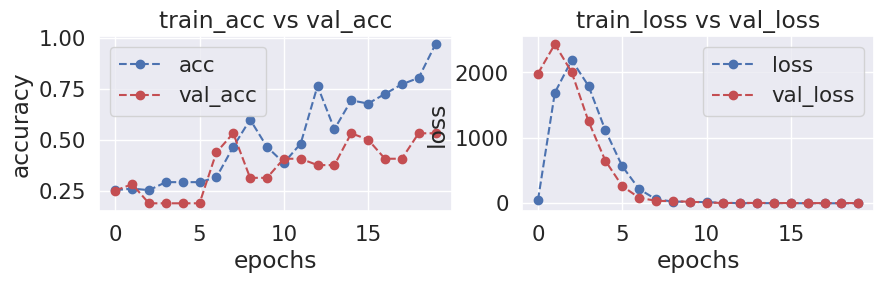

In [12]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)